
## Objective & Observation:

Objective:
 - Reduce the number of parameters below 15k
 - Get validation accuracy of around 9.4 while doing the **above**
 - Increase the epoc to 20 to check if the validation accuracy gets better
 

---

Observation:
- Reduced the epoch from 20 to 10 as the highest accuracy got was within 10 epchs. 
(Learning: Increase the epoch only if the test accuracy and training accuracy keeps increasing till 10 epochs. It indicates that the model can have better test accuracy if trained more. Model could be overfitting with this aproach, but that can be addressed with dropout )
- The gap between the test and training accuracy is increasing, indicating chances of overfitting.
- Getting test accuracy of 99.16 with parameters: 13,504 after 10 epocs.
- Highest test accuracy is 99.23 at 9th epoch

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential

from keras.layers import Dense, Activation, Flatten, Add

from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


*   Printing the number of data in X_train, dimension of each image and plotting the first image in X_train




(60000, 28, 28)


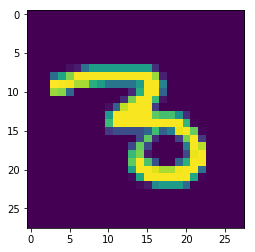

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[30])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

*   displays the first 10 output values in the output training dataset

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

* Converts each value in the output training and testing dataset into vector of dimension 1xnumber_of_classes
* The values in the vector will be 0. or 1. 
* Only one of the values in each vector will be 1, indicating the class to which the input data belongs to. Eg the first value in the y_train is 5, this will be converted into  [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]. 
* The 6th value in the vector will be 1 indicating class 5.
* The first value in the vector represents class 0, second value represents class 1 and so on.

* Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

* displays the first 10 output values in the output training dataset after conversion to vectors


In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Training DNN Model

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26, RF: 3

# Convolution block 1
model.add(Convolution2D(16, 3, 3, activation='relu')) #24, RF: 5
model.add(Convolution2D(20, 3, 3, activation='relu')) #22, RF: 7

# Transision block 1
model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF: 14
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11, RF: 14

# Convolution block 2
model.add(Convolution2D(16, 3, 3, activation='relu')) #9, RF: 16
model.add(Convolution2D(20, 3, 3, activation='relu')) #7, RF: 18

model.add(Convolution2D(10, 1, activation='relu')) #7, RF: 18
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-package

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 20)        2900      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 8)         168       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 20)          2900      
__________

* Compiles the convolution model. 
* Compile method takes 3 parameters - loss, optimizer, metrics
* loss - lower the score, better the performance. value: categorical_crossentropy (commonly used)
* optimizer - controls the learning rate (determines how fast the optimal weights for the model are calculated)
* metrics - displays the accuracy metrics. indicates the accuracy of the trained model 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Observation
- Reduced the epoch from 20 to 10 as the highest accuracy got was within 10 epchs. 
(Learning: Increase the epoch only if the test accuracy and training accuracy keeps increasing till 10 epochs. It indicates that the model can have better test accuracy if trained more. Model could be overfitting with this aproach, but that can be addressed with dropout )
- The gap between the test and training accuracy is increasing, indicating chances of overfitting.
- Getting test accuracy of 99.16 with parameters: 13,504 after 10 epocs
- Highest test accuracy is 99.23 at 9th epoch

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.1996 - acc: 0.9365 - val_loss: 0.0757 - val_acc: 0.9771
Epoch 2/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0666 - acc: 0.9793 - val_loss: 0.0506 - val_acc: 0.9840
Epoch 3/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0507 - acc: 0.9840 - val_loss: 0.0320 - val_acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.0412 - acc: 0.9873 - val_loss: 0.0311 - val_acc: 0.9901
Epoch 5/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0266 - val_acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0305 - acc: 0.9904 - val_loss: 0.0362 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0276 - acc: 0.9913 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.02537218309555319, 0.9916]


* The trained model predicts the output for all the input dataset in X_test


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.07782523e-13 1.11014603e-14 6.58076942e-07 1.88741339e-07
  4.26223464e-15 1.40413408e-12 2.69577828e-22 9.99998927e-01
  1.83520532e-10 2.64645735e-07]
 [2.79942047e-09 2.52600092e-08 1.00000000e+00 1.40182414e-11
  9.34692536e-13 1.10611820e-15 4.61851529e-11 7.40285281e-15
  2.43816911e-10 2.46652077e-16]
 [3.74502171e-08 9.99955058e-01 4.33910316e-07 2.50709292e-07
  3.37494603e-05 4.08435290e-06 1.01584128e-08 4.60056845e-06
  6.52298411e-07 1.11642737e-06]
 [9.99926090e-01 1.18813091e-14 2.72201902e-07 8.03080002e-09
  3.19984039e-09 2.44073306e-07 3.65492524e-05 1.74201742e-09
  2.38274126e-07 3.65435044e-05]
 [7.40322907e-12 8.19682995e-16 1.38203132e-12 2.54347108e-13
  9.99999762e-01 7.83562625e-12 3.54694735e-13 4.92922015e-14
  1.00040767e-08 2.88007840e-07]
 [3.32385753e-07 9.99862432e-01 1.09647581e-05 1.68550240e-08
  6.07949805e-05 5.20277288e-09 2.16513940e-09 4.42391611e-05
  3.08519566e-06 1.80836905e-05]
 [4.72261847e-21 2.60774865e-14 1.00633657e-09 4.39428482e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored